In [1]:
import pandas as pd

# KDD Cup 99 Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("kddcup (1).data", header=None)

# Ïª¨Îüº Ïù¥Î¶Ñ ÏÑ§Ï†ï 
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot",
    "num_failed_logins", "logged_in", "num_compromised", "root_shell",
    "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"
]

df.columns = columns

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df.head())
print(df.shape)  # (Ìñâ Í∞úÏàò, Ïó¥ Í∞úÏàò)


   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [2]:
df.dropna(inplace=True)

In [3]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# Î≥ÄÌôò ÌõÑ ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏
print(df['label'].value_counts()) 

label
1    3925650
0     972781
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# protocol_type, service, flagÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
encoder_protocol = LabelEncoder()
df['protocol_type'] = encoder_protocol.fit_transform(df['protocol_type'])

encoder_service = LabelEncoder()
df['service'] = encoder_service.fit_transform(df['service'])

encoder_flag = LabelEncoder()
df['flag'] = encoder_flag.fit_transform(df['flag'])

print(df.head())  # Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       24     9        215      45076     0   
1         0              1       24     9        162       4528     0   
2         0              1       24     9        236       1228     0   
3         0              1       24     9        233       2032     0   
4         0              1       24     9        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0

In [5]:
from sklearn.model_selection import train_test_split

# X = ÌäπÏßï Îç∞Ïù¥ÌÑ∞, y = ÎùºÎ≤®
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3918744, 41)
Test shape: (979687, 41)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = model.predict(X_test)

# Ï†ïÌôïÎèÑ Î∞è Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.990540856416386
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    194689
           1       1.00      0.99      0.99    784998

    accuracy                           0.99    979687
   macro avg       0.98      0.99      0.99    979687
weighted avg       0.99      0.99      0.99    979687



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Ïä§ÏºÄÏùºÎü¨ Ï†ÅÏö©Ìïú Î™®Îç∏ ÏÉùÏÑ±
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9983545765127025
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    194689
           1       1.00      1.00      1.00    784998

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



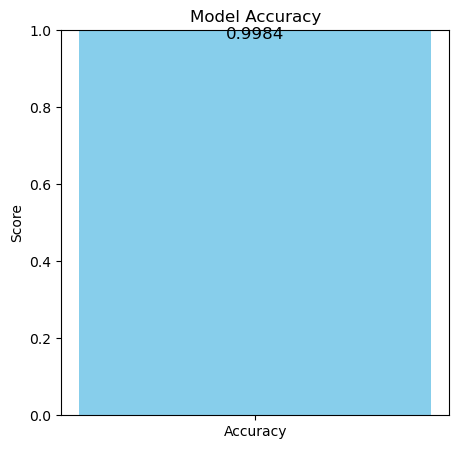

In [8]:
import matplotlib.pyplot as plt

# Ï†ïÌôïÎèÑ Í∞í
accuracy = 0.9983545765127025  # ÏßÅÏ†ë ÏûÖÎ†• or accuracy_score(y_test, y_pred)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Accuracy")
plt.text(0, accuracy - 0.02, f"{accuracy:.4f}", fontsize=12, ha='center')
plt.show()


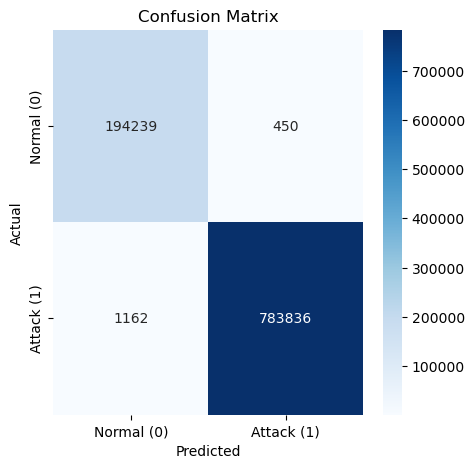

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred)

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Attack (1)"], yticklabels=["Normal (0)", "Attack (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


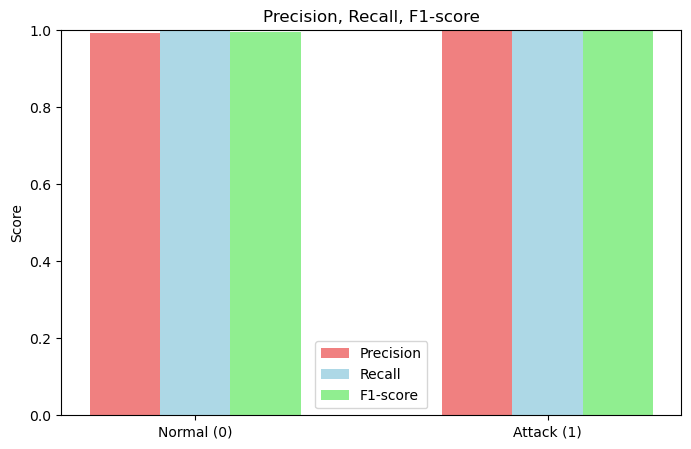

In [10]:
import numpy as np
from sklearn.metrics import classification_report

# Classification Report Ï∂îÏ∂ú
report = classification_report(y_test, y_pred, output_dict=True)

# ÌÅ¥ÎûòÏä§Î≥Ñ Precision, Recall, F1-score Í∞ÄÏ†∏Ïò§Í∏∞
labels = ['Normal (0)', 'Attack (1)']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision', color='lightcoral')
plt.bar(x, recall, width, label='Recall', color='lightblue')
plt.bar(x + width, f1_score, width, label='F1-score', color='lightgreen')

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Precision, Recall, F1-score")
plt.legend()
plt.show()


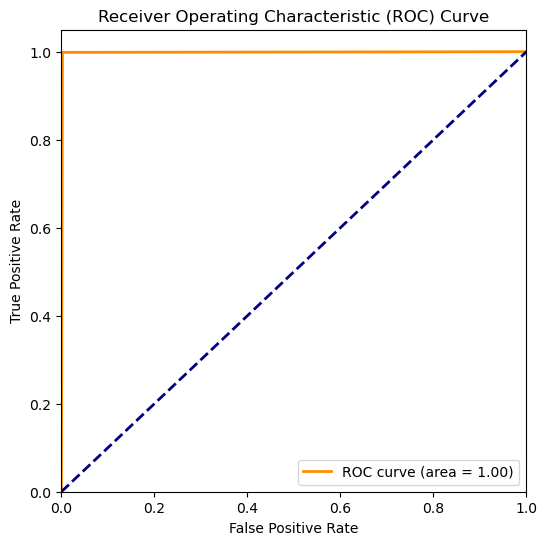

In [11]:
from sklearn.metrics import roc_curve, auc

# ROC Curve Í≥ÑÏÇ∞
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # ÎåÄÍ∞ÅÏÑ† (Î¨¥ÏûëÏúÑ Î™®Îç∏)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9999479425571637
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    194689
           1       1.00      1.00      1.00    784998

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



Random Forest Accuracy: 0.9999479425571637
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    194689
           1       1.00      1.00      1.00    784998

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



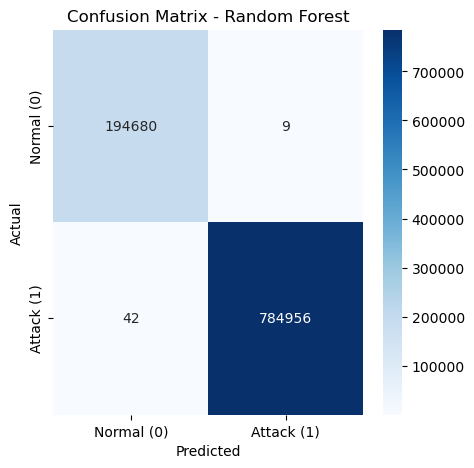

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ±
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Î™®Îç∏ ÌïôÏäµ
model_rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred_rf = model_rf.predict(X_test)

# ÌèâÍ∞Ä
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Attack (1)"], yticklabels=["Normal (0)", "Attack (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [14]:
!pip install tqdm

In [15]:
!pip install tqdm

from tqdm import trange, notebook            # show progress-bar


In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Î∞∞Ïπò Îã®ÏúÑÎ°ú SVM ÌïôÏäµÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
batch_size = 100000  # Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Ïóê Îî∞Îùº Ï°∞Ï†à
num_batches = int(np.ceil(len(X_train) / batch_size))

# SVM Î™®Îç∏ ÏÉùÏÑ± (ÌëúÏ§ÄÌôî Ìè¨Ìï®)
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))

# ÏßÑÌñâÎ•† ÌëúÏãúÌïòÎ©¥ÏÑú ÌïôÏäµ
with tqdm(total=num_batches, desc="Training Progress", unit=" batch") as pbar:
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        X_batch = X_train[start:end]
        y_batch = y_train[start:end]

        svm_model.fit(X_batch, y_batch)  # Î∂ÄÎ∂Ñ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
        pbar.update(1)  # ÏßÑÌñâÎ•† ÏóÖÎç∞Ïù¥Ìä∏

# ÏòàÏ∏° ÏàòÌñâ
y_pred_svm = svm_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [02:45<00:00,  4.15s/ batch]


SVM Accuracy: 0.9986403820812157
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    194689
           1       1.00      1.00      1.00    784998

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



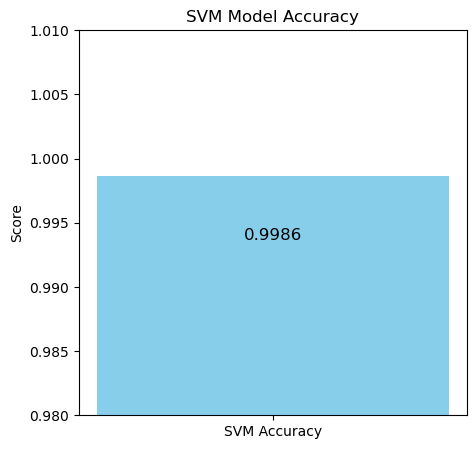

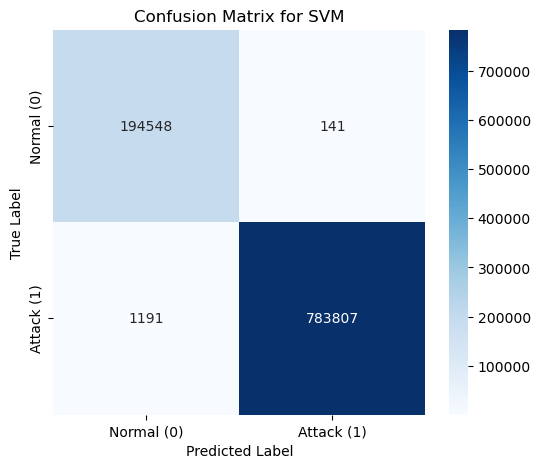

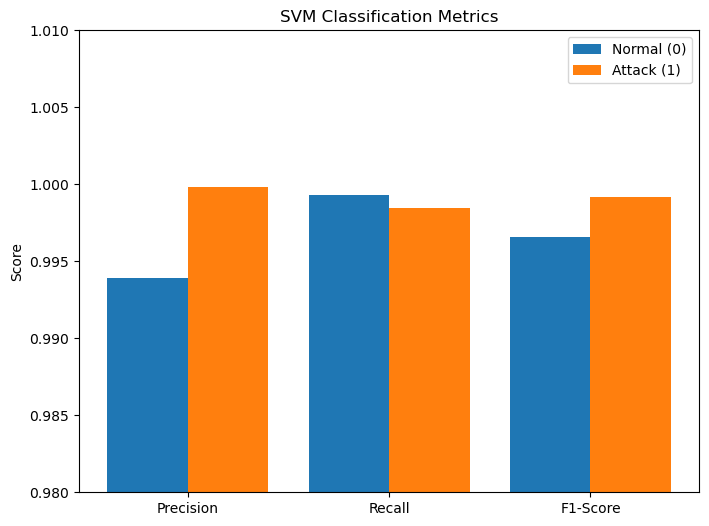

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# SVM Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌôúÏö©ÌïòÏó¨ ÏãúÍ∞ÅÌôî
y_pred_svm = svm_model.predict(X_test)

# 1Ô∏è‚É£ Ï†ïÌôïÎèÑ ÏãúÍ∞ÅÌôî
accuracy = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(5, 5))
plt.bar(["SVM Accuracy"], [accuracy], color="skyblue")
plt.ylim(0.98, 1.01)
plt.ylabel("Score")
plt.title("SVM Model Accuracy")
plt.text(0, accuracy - 0.005, f"{accuracy:.4f}", fontsize=12, ha="center")
plt.show()

# 2Ô∏è‚É£ ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix) ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred_svm)
labels = ["Normal (0)", "Attack (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()

# 3Ô∏è‚É£ Precision, Recall, F1-score ÏãúÍ∞ÅÌôî
report = classification_report(y_test, y_pred_svm, output_dict=True)
metrics = ["Precision", "Recall", "F1-Score"]
normal_scores = [report["0"]["precision"], report["0"]["recall"], report["0"]["f1-score"]]
attack_scores = [report["1"]["precision"], report["1"]["recall"], report["1"]["f1-score"]]

x = np.arange(len(metrics))

plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, normal_scores, 0.4, label="Normal (0)")
plt.bar(x + 0.2, attack_scores, 0.4, label="Attack (1)")

plt.xticks(x, metrics)
plt.ylim(0.98, 1.01)
plt.ylabel("Score")
plt.title("SVM Classification Metrics")
plt.legend()
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ‚úÖ Logistic Regression Î™®Îç∏ ÌïôÏäµ
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train, y_train)

# ‚úÖ Random Forest Î™®Îç∏ ÌïôÏäµ (Í∏∞Ï°¥Ïóê ÌïôÏäµÌïú Î™®Îç∏Ïù¥ ÏóÜÎã§Î©¥)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ‚úÖ 1. StandardScaler()Î°ú Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî + max_iter Ï¶ùÍ∞Ä
logreg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver="lbfgs"))

# Î™®Îç∏ ÌïôÏäµ
logreg_model.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred_logreg = logreg_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9983545765127025
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    194689
           1       1.00      1.00      1.00    784998

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687



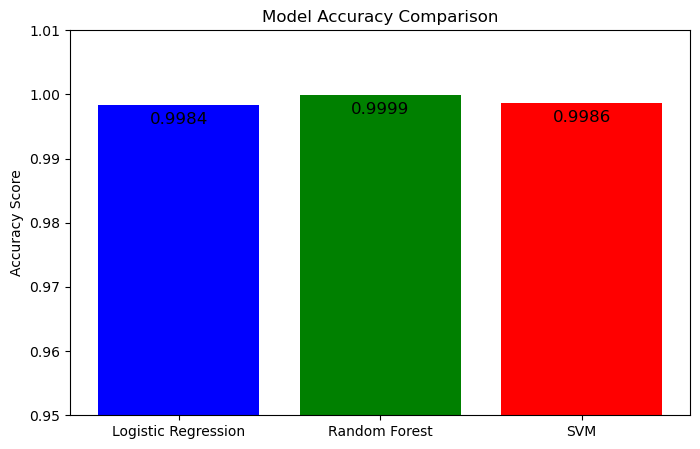

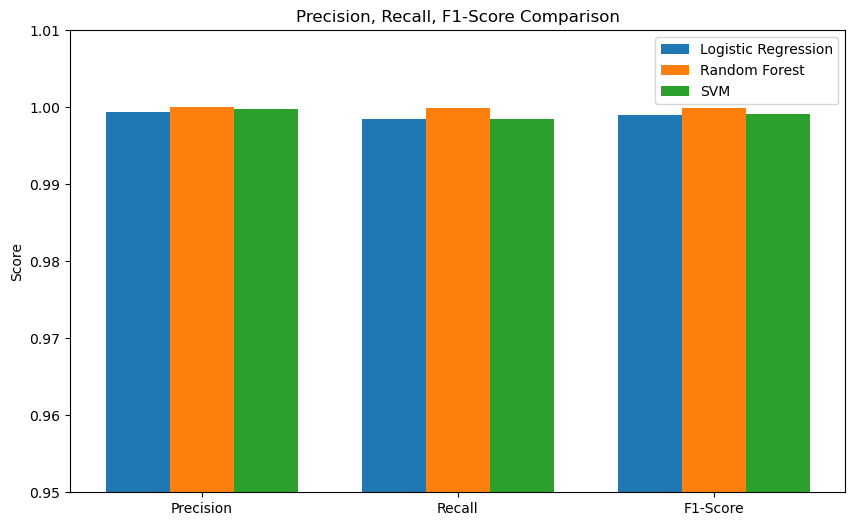

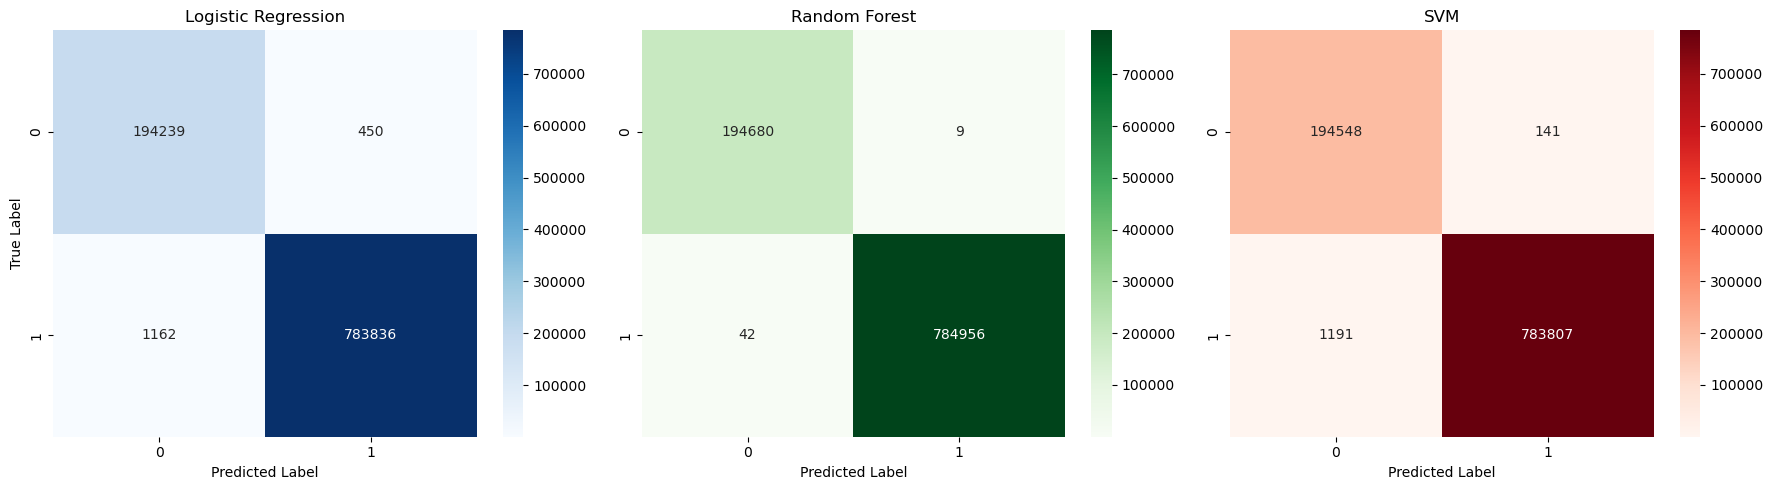

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ‚úÖ Í∏∞Ï°¥ ÌïôÏäµÎêú Î™®Îç∏Îì§Ïùò ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
y_pred_logreg = logreg_model.predict(X_test)  # Logistic Regression
y_pred_rf = rf_model.predict(X_test)          # Random Forest
y_pred_svm = svm_model.predict(X_test)        # SVM

# ‚úÖ Î™®Îç∏Î≥Ñ ÏÑ±Îä• Ï∏°Ï†ï
models = ["Logistic Regression", "Random Forest", "SVM"]
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

# üìä 1Ô∏è‚É£ Ï†ïÌôïÎèÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "green", "red"])
plt.ylim(0.95, 1.01)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 0.003, f"{acc:.4f}", ha="center", fontsize=12)
plt.show()

# üìä 2Ô∏è‚É£ Precision, Recall, F1-score ÎπÑÍµê
metrics = ["Precision", "Recall", "F1-Score"]

# Logistic Regression ÏÑ±Îä•
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
logreg_scores = [report_logreg["1"]["precision"], report_logreg["1"]["recall"], report_logreg["1"]["f1-score"]]

# Random Forest ÏÑ±Îä•
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
rf_scores = [report_rf["1"]["precision"], report_rf["1"]["recall"], report_rf["1"]["f1-score"]]

# SVM ÏÑ±Îä•
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
svm_scores = [report_svm["1"]["precision"], report_svm["1"]["recall"], report_svm["1"]["f1-score"]]

x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.25, logreg_scores, 0.25, label="Logistic Regression")
plt.bar(x, rf_scores, 0.25, label="Random Forest")
plt.bar(x + 0.25, svm_scores, 0.25, label="SVM")

plt.xticks(x, metrics)
plt.ylim(0.95, 1.01)
plt.ylabel("Score")
plt.title("Precision, Recall, F1-Score Comparison")
plt.legend()
plt.show()

# üìä 3Ô∏è‚É£ Confusion Matrix ÎπÑÍµê
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted Label")

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()
